In [1]:
import tools
images, data, target = tools.load_data()

scaler, data = tools.scale(data)
pca, feature_reduced_data = tools.reduce(data, 40)

In [2]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_reduced_data, target, test_size=0.2, random_state=10)

In [3]:
from sklearn.model_selection import GridSearchCV
params = {'hidden_layer_sizes': [pow(10,x) for x in range(4)], 'alpha': [0.01,0.001, 0.0001, 0.00001]}

cv = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=10), cv=10, n_jobs=-1)
cv.fit(X_train, y_train)

print("Train accuracy:", cv.score(X_train, y_train))
print("Test accuracy:", cv.score(X_test, y_test))

print(cv.best_params_)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Train accuracy: 1.0
Test accuracy: 0.8369641602248771
{'alpha': 0.0001, 'hidden_layer_sizes': 1000}


In [4]:
clf = MLPClassifier(hidden_layer_sizes=1000,alpha=0.0001, max_iter=1000)
clf.fit(X_train, y_train)
print("Train accuracy:",clf.score(X_train, y_train))
print("Test accuracy:",clf.score(X_test, y_test))

import numpy as np
preds = clf.predict_proba(feature_reduced_data)
preds_idx = np.argsort(-preds, axis = 1)

Train accuracy: 1.0
Test accuracy: 0.8348559381588194


Prediction ['y']
Actual class: z


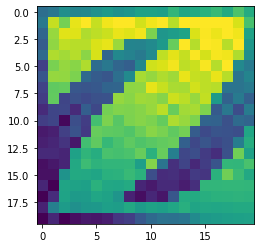

Top 5 predictions:
y => 78.61%
v => 8.74%
z => 7.0%
x => 2.96%
i => 1.35%


In [5]:
import matplotlib.pyplot as plt
image = -50
print("Prediction",clf.predict([feature_reduced_data[image]]))
print("Actual class:",target[image])
plt.imshow(images[image])
plt.show()

print("Top 5 predictions:")
for p in preds_idx[image][:5]:
    print(clf.classes_[p],"=>",str(round(preds[image][p]*100,2))+'%')

NameError: name 'capitalize' is not defined

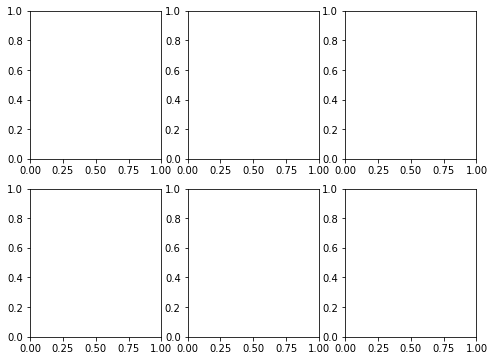

In [19]:
fig, axs = plt.subplots(2,3, figsize = (8,6))
pred = clf.predict([feature_reduced_data[0]])
axs[0,0].set_title('Prediction: ' + pred[0].capitalize())
axs[0,0].imshow(images[0])
pred = clf.predict([feature_reduced_data[1000]])
axs[0,0].set_title('Prediction: ' + pred[0].capitalize())
axs[0,1].imshow(images[1000])
pred = clf.predict([feature_reduced_data[2000]])
axs[0,0].set_title('Prediction: ' + pred[0].capitalize())
axs[0,2].imshow(images[2000])
pred = clf.predict([feature_reduced_data[3000]])
axs[0,0].set_title('Prediction: ' + pred[0].capitalize())
axs[1,0].imshow(images[3000])
pred = clf.predict([feature_reduced_data[4000]])
axs[0,0].set_title('Prediction: ' + capitalize(pred[0]))
axs[1,1].imshow(images[4000])
pred = clf.predict([feature_reduced_data[5000]])
axs[0,0].set_title('Prediction: ' + capitalize(pred[0]))
axs[1,2].imshow(images[5000])
plt.show()

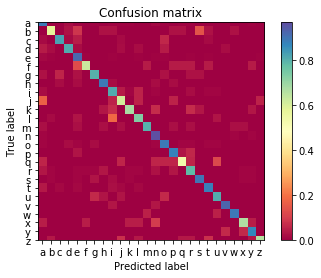

In [6]:
tools.plot_confusion_matrix(y_test, clf.predict(X_test), clf.classes_, "Confusion matrix")